## Assignment : 14

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os



from collections import Counter
from keras.utils import to_categorical

from tensorflow.keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from scipy.sparse import hstack
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import LSTM,Bidirectional
from keras.layers.core import Dense, Dropout
from keras.models import Model, load_model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = "/content/drive/My Drive/preprocessed_data.csv"

In [0]:
file_resource = "/content/drive/My Drive/resources.csv"
tr="/content/drive/My Drive/train_data.csv"

In [0]:
proj=pd.read_csv(tr)
price_da=pd.read_csv(file_resource)

In [0]:
project_data = pd.merge(proj, price_da, on='id', how='left')

In [0]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,description,quantity,price
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Alphabet Circus Rock and Learn DVD,3,14.59
1,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Getting Ready for Kindergarten DVD,3,14.59


In [0]:
quanlity=project_data['quantity']

In [0]:
x=pd.read_csv(data)
y=x['project_is_approved']

In [0]:
from keras.utils import to_categorical
y = to_categorical(y)

In [0]:
x['quantity']=quanlity

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [0]:
rem_input_train = np.concatenate((x_train['quantity'].values.reshape(-1,1),x_train['price'].values.reshape(-1,1),x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)), axis=1)
#rem_input_cv = np.concatenate((x_cross['quantity'].values.reshape(-1,1),x_cross['price'].values.reshape(-1,1),x_cross['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)), axis=1)
rem_input_test = np.concatenate((x_test['quantity'].values.reshape(-1,1),x_test['price'].values.reshape(-1,1),x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)), axis=1)

In [0]:

rem_input_train_norm  = np.hstack((x_train_price_norm,x_train_tpp_norm,x_train_qty_norm))
rem_input_test_norm = np.hstack((x_test_price_norm,x_test_tpp_norm,x_test_qty_norm))

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(rem_input_train)
rem_input_train_norm = scale.transform(rem_input_train)

rem_input_test_norm = scale.transform(rem_input_test)

In [0]:
rem_input_test_norm .shape

(21850, 3)

In [0]:
### text

In [0]:
#https://subscription.packtpub.com/book/application_development/9781782167853/1/ch01lvl1sec10/tokenizing-sentences-into-words
t = Tokenizer()
t.fit_on_texts(x_train['essay'])
vocab_size = len(t.word_index) + 1
print('Total unique words in the x_train',vocab_size)
encoded_train = t.texts_to_sequences(x_train['essay'])
encoded_test = t.texts_to_sequences(x_test['essay'])

Total unique words in the x_train 51763


In [0]:
max_length = 300
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print("length of padded_train data",len(padded_train))
print("length of padded_test data",len(padded_test))

length of padded_train data 87398
length of padded_test data 21850


In [0]:
fil = '/content/drive/My Drive/glove_vectors'

In [0]:
with open('/content/drive/My Drive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# for train
embedding_matrix_train = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    if word in glove_words:
        embedding_vector = model[word]
        embedding_matrix_train[i] = embedding_vector

In [0]:
###"#" cate

In [0]:
def self_token(column):
    unique = list(set(column))
    total = list(column)
    size = len(unique)
    count = []
    for category in unique:
        count.append([total.count(category),category])
    count.sort()
    rank = {}
    for i in range(1,len(count)+1):
        rank.update({count[i-1][1] : i})
    return (rank , unique,size)

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(x_train['clean_categories'])

x_test["clean_categories"] = x_test["clean_categories"].map(lambda a: '<unknown>' if a not in le.classes_ else a)
#x_cv["project_subject_categories"] = x_cv["project_subject_categories"].map(lambda a: '<unknown>' if a not in le.classes_ else a)

le.classes_ = np.append(le.classes_, '<unknown>')

tr_pro_encode = le.transform(x_train['clean_categories'])

test_pro_encode = le.transform(x_test['clean_categories'])

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(x_train['clean_subcategories'])

x_test["clean_subcategories"] = x_test["clean_subcategories"].map(lambda a: '<unknown>' if a not in le.classes_ else a)

le.classes_ = np.append(le.classes_, '<unknown>')

tr_pro_sub_encode = le.transform(x_train['clean_subcategories'])
#cv_pro_sub_encode = le.transform(x_cv['clean_subcategories'])
test_pro_sub_encode = le.transform(x_test['clean_subcategories'])

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

tr_sch_encode = le.fit_transform(x_train['school_state'])
#cv_sch_encode = le.transform(x_cv['school_state'])
test_sch_encode = le.transform(x_test['school_state'])

In [0]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

tr_tea_pre_encode = le.fit_transform(x_train['teacher_prefix'])
#cv_tea_pre_encode = le.transform(x_cv['teacher_prefix'])
test_tea_pre_encode = le.transform(x_test['teacher_prefix'])

In [0]:
t_prefix_rank, unique,size = self_token(x_train['teacher_prefix'])
print(t_prefix_rank)
teacher_prefix_size =size
encoded_t_prefix_train = []
encoded_t_prefix_test = []
for prefix in x_train['teacher_prefix']:
    encoded_t_prefix_train.append(t_prefix_rank[prefix])

for prefix in x_test['teacher_prefix']:
    if prefix in unique:
        encoded_t_prefix_test.append(t_prefix_rank[prefix]) 
    else:
        encoded_t_prefix_test.append(0) 
    
encoded_t_prefix_train = np.asarray(encoded_t_prefix_train)
encoded_t_prefix_test = np.asarray(encoded_t_prefix_test)

{'dr': 1, 'teacher': 2, 'mr': 3, 'ms': 4, 'mrs': 5}


In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

tr_pro_gra_encode = le.fit_transform(x_train['project_grade_category'])
#cv_pro_gra_encode = le.transform(x_cv['project_grade_category'])
test_pro_gra_encode = le.transform(x_test['project_grade_category'])

In [0]:
x_train.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [0]:
ins = []
concat = []

In [0]:
from keras.layers import Reshape,Concatenate

##### creating embedding layer for categorical data

In [0]:
# Unique values
# Unique values
tea_pre_uni = x_train['teacher_prefix'].nunique()
emb_tea_pre_size = int(np.ceil((tea_pre_uni) / 2))

# Creating an input layer
inp_tea_pre = Input(shape = (1,), name = "teacher_prefix")

# Creating an embedding layer
emb_tea_pre = Embedding(input_dim = tea_pre_uni, output_dim = emb_tea_pre_size,
                         trainable = True, name = "teacher_prefix_emb")(inp_tea_pre)

flatten_tea_pre = Flatten()(emb_tea_pre)

In [0]:
# Unique values
sch_uni = x_train['school_state'].nunique()
emb_sch_size = int(np.ceil((sch_uni) / 2))

# Creating an input layer
inp_sch = Input(shape = (1,), name = "school_state")

# Creating an embedding layer
emb_sch = Embedding(input_dim = sch_uni, output_dim = emb_sch_size,
                         trainable = True, name = "school_state_emb")(inp_sch)

flatten_sch = Flatten()(emb_sch)

In [0]:

# Unique values
pro_gra_uni = x_train['project_grade_category'].nunique()
emb_pro_gra_size = int(np.ceil((pro_gra_uni) / 2))

# Creating an input layer
inp_pro_gra = Input(shape = (1,), name = "project_grade_category")

# Creating an embedding layer
emb_pro_gra = Embedding(input_dim = pro_gra_uni, output_dim = emb_pro_gra_size,
                         trainable = True, name = "project_grade_category_emb")(inp_pro_gra)

flatten_pro_gra = Flatten()(emb_pro_gra)

In [0]:
# Unique values
pro_sub_uni = x_train['clean_categories'].nunique()
emb_pro_sub_size = int(np.ceil((pro_sub_uni) / 2))

# Creating an input layer
inp_pro_sub = Input(shape = (1,), name = "clean_categories")

# Creating an embedding layer
emb_pro_sub = Embedding(input_dim = pro_sub_uni, output_dim = emb_pro_sub_size,
                         trainable = True, name = "project_subject_categories_emb")(inp_pro_sub)

flatten_pro_sub = Flatten()(emb_pro_sub)

In [0]:

# Unique values
pro_sub_1_uni = x_train['clean_subcategories'].nunique()


emb_pro_sub_1_size = int(min(np.ceil((pro_sub_1_uni) / 2), 50))

# Creating an input layer
inp_pro_sub_1 = Input(shape = (1,), name = "project_subject_subcategories")

# Creating an embedding layer
emb_pro_sub_1 = Embedding(input_dim = pro_sub_1_uni, output_dim = emb_pro_sub_1_size,
                         trainable = True, name = "project_subject_subcategories_emb")(inp_pro_sub)

flatten_pro_sub_1 = Flatten()(emb_pro_sub_1)

In [0]:
x = concatenate([flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,flatten_6,dense_1])

In [0]:
import keras.backend as K
K.clear_session()

In [0]:
from keras.layers import Flatten
from keras.regularizers import l2
from keras.layers import concatenate

In [0]:
essay_input = Input(shape=(300,), name='essay_input')

x = Embedding(vocab_size, 300, weights=[embedding_matrix_train],trainable = False, input_length=300)(essay_input)
lstm_out = LSTM(100,recurrent_dropout=0.5,return_sequences=True)(x)
flatten_1 = Flatten()(lstm_out)

In [0]:
# Creating an input layer
input_lay = Input(shape = (300, ), name = "Input_Text_Data")

# Creating an embedding layer
emb_lay = Embedding(input_dim = vocab_size, output_dim = 300,
                         input_length = 300, weights = [embedding_matrix_train],
                         trainable = False, name = "lstm_text_layer")(input_lay)

# Creating LSTM layer
emb_lay_text = LSTM(128, return_sequences = True, dropout = 0.3)(emb_lay)

flatten_1 = Flatten()(emb_lay_text)







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
import keras
from tensorboardcolab import *
from keras.regularizers import l2
from keras.layers import LeakyReLU


In [0]:
rem_input_layer =  Input(shape=(3,), name="rem_input_layer")

rem_input_dense = Dense(64, activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2(0.001))(rem_input_layer)

In [0]:
remaining_input = Input(shape=(3,), name='remaining_input')
dense_1 = Dense(100, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(remaining_input)


In [0]:
from keras.layers import concatenate
    
con_lay = concatenate([flatten_1, flatten_tea_pre, flatten_sch, flatten_pro_gra, flatten_pro_sub, flatten_pro_sub_1, rem_input_dense])

In [0]:



#con_lay = concatenate([flatten_1, flatten_tea_pre, flatten_sch, flatten_pro_gra, flatten_pro_sub, flatten_pro_sub_1, emb_num])

'''state = Input(shape=(1,), name='school_state')
x = Embedding(state_size, 10, input_length=1)(state)
flatten_2 = Flatten()(x)


project_grade_category = Input(shape=(1,), name='project_grade_category')
x = Embedding(project_grade_categories_size, 10, input_length=1)(project_grade_category)
flatten_3 = Flatten()(x)


clean_categories = Input(shape=(1,), name='clean_categories')
x = Embedding(categories_size, 10, input_length=1)(clean_categories)
flatten_4 = Flatten()(x)


clean_sub_categories = Input(shape=(1,), name='clean_sub_categories')
x = Embedding(subcategories_size, 10, input_length=1)(clean_sub_categories)
flatten_5 = Flatten()(x)


teacher_prefix = Input(shape=(1,), name='teacher_prefix')
x = Embedding(teacher_prefix_size, 10, input_length=1)(teacher_prefix)
flatten_6 = Flatten()(x)'''


'''remaining_input = Input(shape=(3,), name='remaining_input')
dense_1 = Dense(1, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(remaining_input)

con_lay = concatenate([flatten_1, flatten_tea_pre, flatten_sch, flatten_pro_gra, flatten_pro_sub, flatten_pro_sub_1, dense_1],axis=1)'''

# Layer 1
m = Dense(256, activation = 'relu', kernel_regularizer = l2(0.01))(con_lay)
m = Dropout(0.3)(m)

# Layer 2
m = Dense(128, activation = 'relu', kernel_regularizer = l2(0.01))(m)
m = Dropout(0.3)(m)

# Layer 3
m = Dense(64, activation = 'relu', kernel_regularizer = l2(0.01))(m)
m = Dropout(0.3)(m)

# Layer 4
m = Dense(32, activation = 'relu', kernel_regularizer = l2(0.01))(m)
m = Dropout(0.3)(m)

# Output layer
final_output = Dense(2, activation = 'softmax', name= 'model_1_output')(m)

model_1 = Model(inputs = [input_lay, inp_tea_pre, inp_sch, inp_pro_gra,
                        inp_pro_sub, inp_pro_sub_1, rem_input_layer],outputs=[final_output])
print(model_1.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Text_Data (InputLayer)    (None, 300)          0                                            
__________________________________________________________________________________________________
lstm_text_layer (Embedding)     (None, 300, 300)     15528900    Input_Text_Data[0][0]            
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
school_state (InputLayer)       (None, 1)            0                                            
____________________________________________________________________________________________

In [0]:
from keras import backend as K
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
#https://stackoverflow.com/posts/51734992/revisions
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:
train_2 = [padded_train,tr_tea_pre_encode, tr_sch_encode, tr_pro_sub_encode, tr_pro_encode, tr_pro_gra_encode,rem_input_train_norm]
test_2 = [padded_test,test_tea_pre_encode, test_sch_encode, test_pro_sub_encode, test_pro_encode, test_pro_gra_encode,rem_input_test_norm]

In [0]:

batch_size=512

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',auroc])
h2 = model_1.fit(train_2, y_train, batch_size=512,epochs=10, verbose=1, validation_data=(test_2, y_test))



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 87398 samples, validate on 21850 samples
Epoch 1/10
87398/87398 [==============================] - 109s 1ms/step - loss: 1.9295 - acc: 0.8387 - auroc: 0.6032 - val_loss: 0.6573 - val_acc: 0.8486 - val_auroc: 0.7041
Epoch

In [0]:
epochs=10

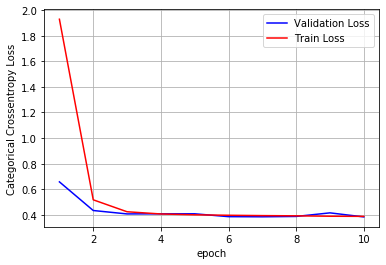

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = h2.history['val_loss']
ty = h2.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
result = model_1.evaluate( test_2,
          y_test,batch_size=512)

21850/21850 [==============================] - 11s 507us/step


In [0]:
#https://github.com/mrunal46/Donors-Choose-using-LSTM/blob/master/LSTM%20-%20model%202-Copy1.ipynb
print("Auc for test data: %0.3f"%roc_auc_score(y_test,model_1.predict(test_2)))
#print("Auc for CV data: %0.3f"%roc_auc_score(y_cv,model.predict([X_cv,X_cv_school_state,X_cv_project_grade,X_cv_project_cat,X_cv_project_subcat,
          # X_cv_teacher_prefix,cv['remaining_input']])))
print("Auc for train data: %0.3f"%roc_auc_score(y_train,model_1.predict(train_2)))

Auc for test data: 0.757
Auc for train data: 0.787


In [0]:
result

[0.3831118217240209, 0.8486041191622649, 0.7565998744059532]

In [0]:

print("{} of test data {}". format(model.metrics_names[0],result[0]))
print("{} of test data {}". format(model.metrics_names[1],result[]))

loss of test data 0.18387332465301437
acc of test data 0.9689352181075697


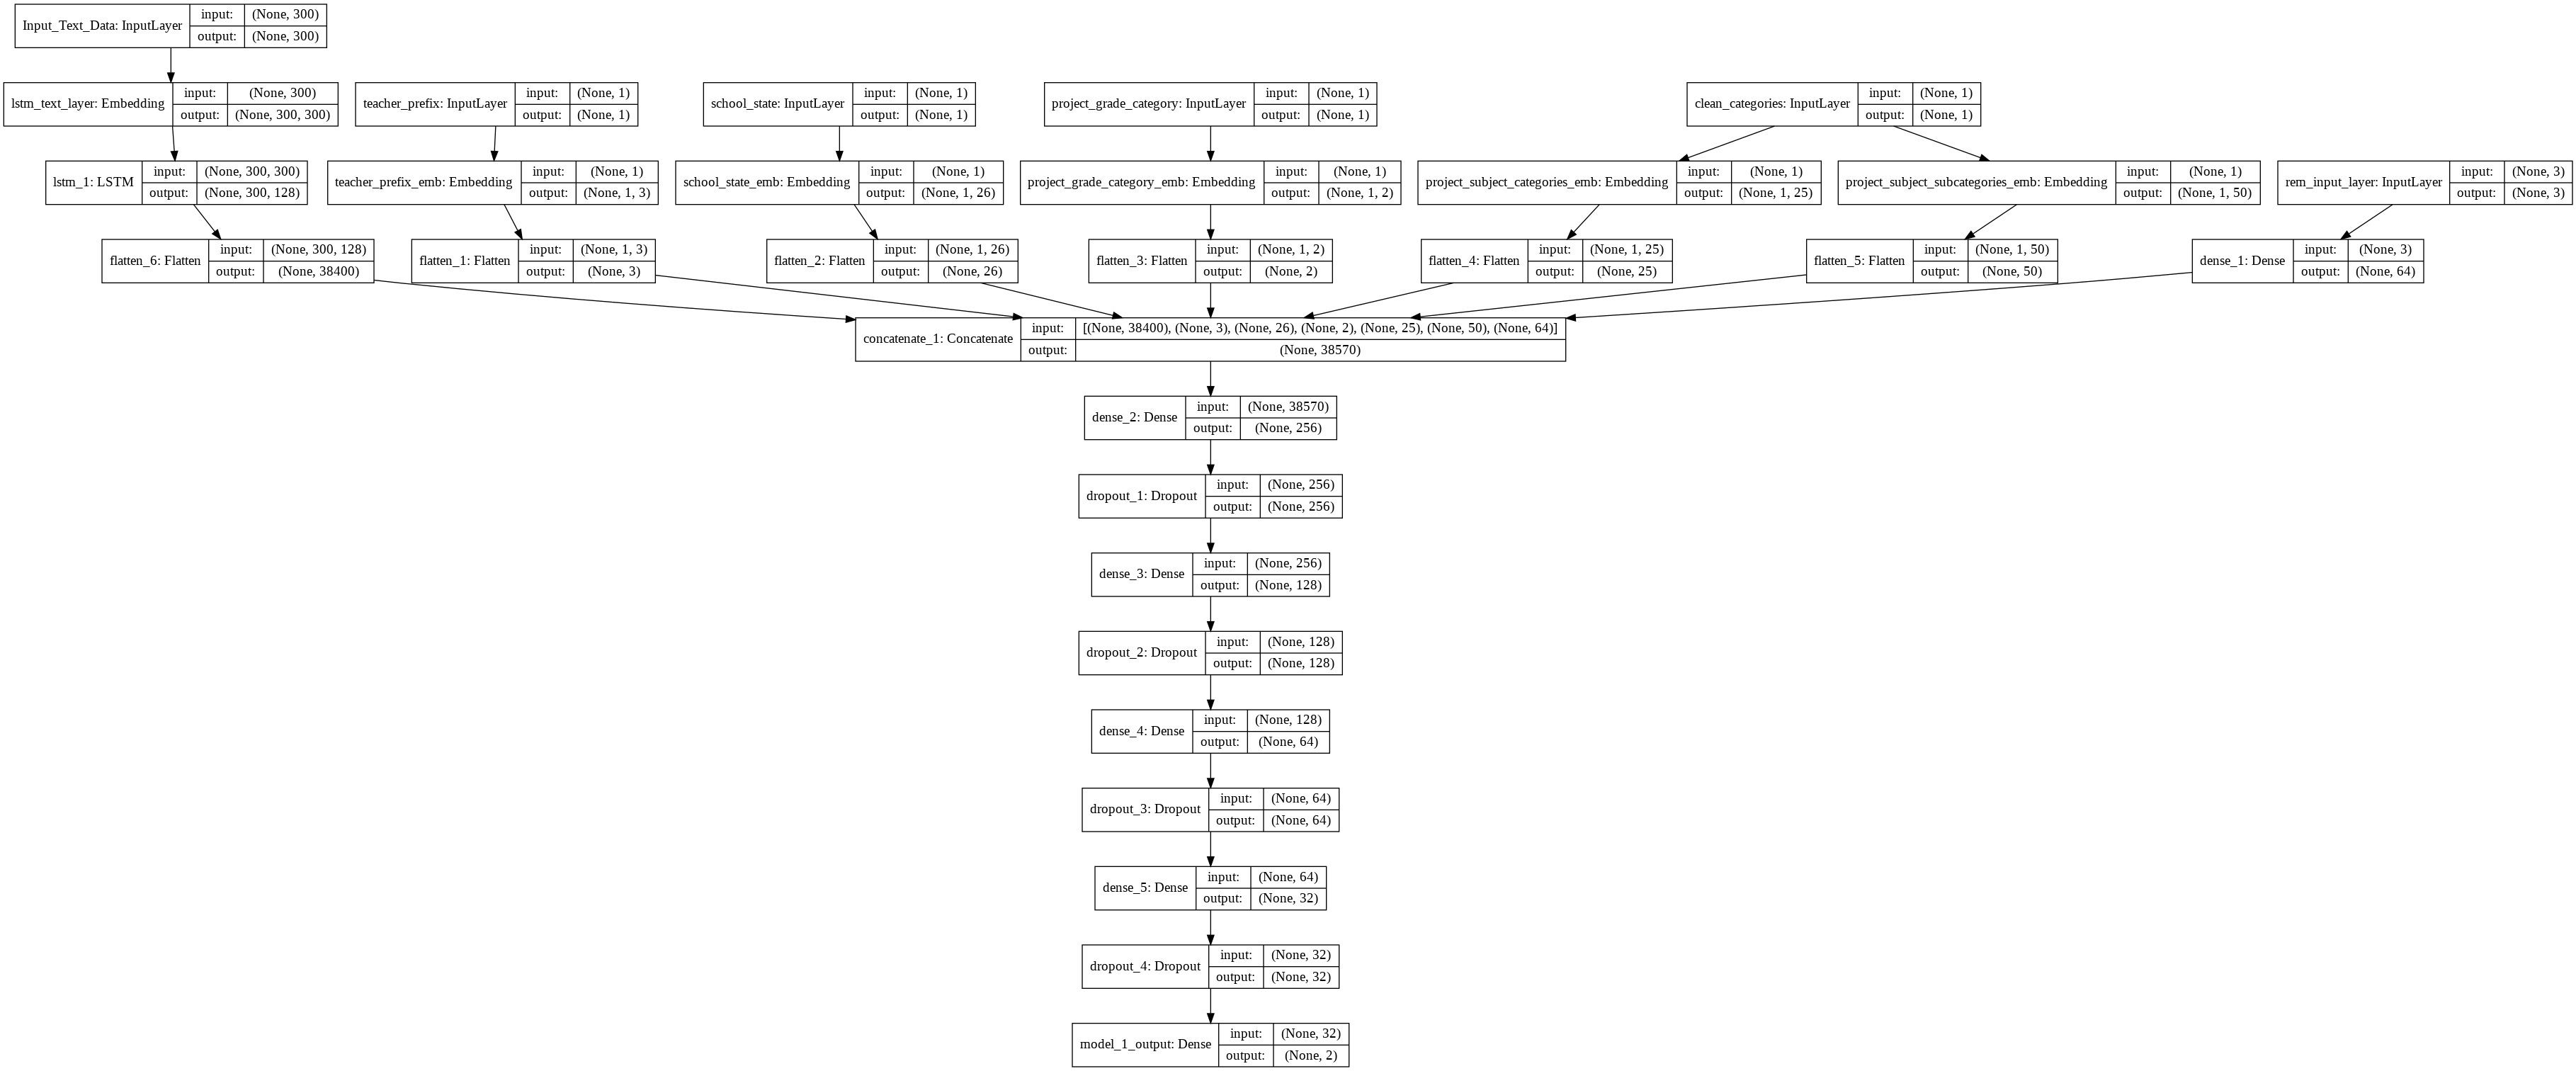

In [0]:

#https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
from keras.utils.vis_utils import plot_model
plot_model(model_1, to_file='/content/drive/My Drive/1.png', show_shapes=True, show_layer_names=True)

In [0]:
x_test.shape

(21850, 10)

##**model 2** 

### text essay

In [0]:
#https://stackoverflow.com/questions/45805493/sorting-tfidfvectorizer-output-by-tf-idf-lowest-to-highest-and-vice-versa
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', stop_words = 'english')

# fit_transform on training data
X_traintfidf = tfidf.fit_transform(x_train['essay'])
X_testtfidf=tfidf.transform(x_test['essay'])

In [0]:
# Zipping feature names corresponding to idf_ values

feat_idf = sorted(zip(tfidf.idf_, tfidf.get_feature_names()))

In [0]:
sort_idf = sorted(tfidf.idf_)

print("Mean of idf values:", np.mean(sort_idf))
print("Median of idf values:", np.median(sort_idf))
print("Maximum of idf values:", max(sort_idf))
print("Minimum of idf values:", min(sort_idf))

Mean of idf values: 10.364929043573493
Median of idf values: 11.279626831262464
Maximum of idf values: 11.685091939370627
Minimum of idf values: 1.007545645394076


In [0]:
q1 = np.percentile(sort_idf, 25)
q3 = np.percentile(sort_idf, 75)

In [0]:
print("25 percentile",q1)
print("75 percentile",q3)

25 percentile 9.670188918828364
75 percentile 11.685091939370627


In [0]:
iqr=q3-q1

In [0]:
list_words = []



for i in range(len(feat_idf)):
    
    if feat_idf[i][0] > iqr and feat_idf[i][0] < q3:
        words = feat_idf[i][1]
        list_words.append(words)

In [0]:
print("Number of words before taking IQR:", len(feat_idf))
print("Number of words after taking IQR:", len(list_words))





Number of words before taking IQR: 51350
Number of words after taking IQR: 31099


**note**
- all embedding layer of categorical data remail same

In [0]:
text=list_words

In [0]:
t = Tokenizer()
t.fit_on_texts(list(text))
vocab_size = len(t.word_index) + 1
print('Total unique words in the x_train',vocab_size)
encoded_train = t.texts_to_sequences(x_train['essay'])
encoded_test = t.texts_to_sequences(x_test['essay'])

Total unique words in the x_train 31100


In [0]:
max_length = 300
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print("length of padded_train data",len(padded_train))
print("length of padded_test data",len(padded_test))

length of padded_train data 87398
length of padded_test data 21850


In [0]:
with open('/content/drive/My Drive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# for train
embedding_matrix_train = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    if word in glove_words:
        embedding_vector = model[word]
        embedding_matrix_train[i] = embedding_vector

In [0]:
essay_input = Input(shape=(300,), name='essay_input')

x = Embedding(vocab_size, 300, weights=[embedding_matrix_train], input_length=300,trainable = False)(essay_input)
lstm_out = LSTM(100,recurrent_dropout=0.3,return_sequences=True)(x)
flatten_1 = Flatten()(lstm_out)

In [0]:
con_lay = concatenate([flatten_1, flatten_tea_pre, flatten_sch, flatten_pro_gra, flatten_pro_sub, flatten_pro_sub_1, rem_input_dense])

In [0]:
from keras.models import Model

# Layer 1
m_2 = Dense(256, activation = 'relu', kernel_regularizer = l2(0.01))(con_lay)
m_2 = Dropout(0.3)(m_2)

# Layer 2
m_2 = Dense(128, activation = 'relu', kernel_regularizer = l2(0.01))(m_2)
m_2 = Dropout(0.3)(m_2)

# Layer 3
m_2 = Dense(64, activation = 'relu', kernel_regularizer = l2(0.01))(m_2)
m_2 = Dropout(0.3)(m_2)

# Layer 3
m_2 = Dense(32, activation = 'relu', kernel_regularizer = l2(0.01))(m_2)
m_2 = Dropout(0.3)(m_2)

# Output layer
final_output = Dense(2, activation = 'softmax', name= 'model_1_output')(m_2)

model_2 = Model(inputs = [essay_input, inp_tea_pre, inp_sch, inp_pro_gra,
                        inp_pro_sub, inp_pro_sub_1, rem_input_layer],outputs=[final_output])
print(model_2.summary())




Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input (InputLayer)        (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 300, 300)     9330000     essay_input[0][0]                
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
school_state (InputLayer)       (None, 1)            0                                            
____________________________________________________________________________________________

In [0]:
import keras.backend as K
K.clear_session()

In [0]:
from keras import backend as K
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
#https://stackoverflow.com/posts/51734992/revisions
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:
train_2 = [padded_train,tr_tea_pre_encode, tr_sch_encode, tr_pro_sub_encode, tr_pro_encode, tr_pro_gra_encode,rem_input_train_norm]
test_2 = [padded_test,test_tea_pre_encode, test_sch_encode, test_pro_sub_encode, test_pro_encode, test_pro_gra_encode,rem_input_test_norm]

In [0]:
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
from keras.callbacks import *
filepath="epochs:{epoch:03d}-val_acc:{val_auroc:.3f}.hdf5"
checkpoint_1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
h2 = model_2.fit(train_2, y_train, batch_size=512,epochs=10, verbose=1, validation_data=(test_2, y_test))

Train on 87398 samples, validate on 21850 samples
Epoch 1/10
87398/87398 [==============================] - 116s 1ms/step - loss: 1.5772 - auroc: 0.6478 - val_loss: 0.5544 - val_auroc: 0.7233
Epoch 2/10
87398/87398 [==============================] - 114s 1ms/step - loss: 0.4661 - auroc: 0.7081 - val_loss: 0.4140 - val_auroc: 0.7349
Epoch 3/10
87398/87398 [==============================] - 115s 1ms/step - loss: 0.4119 - auroc: 0.7207 - val_loss: 0.3945 - val_auroc: 0.7409
Epoch 4/10
87398/87398 [==============================] - 114s 1ms/step - loss: 0.4016 - auroc: 0.7275 - val_loss: 0.3896 - val_auroc: 0.7422
Epoch 5/10
87398/87398 [==============================] - 114s 1ms/step - loss: 0.3958 - auroc: 0.7355 - val_loss: 0.3908 - val_auroc: 0.7459
Epoch 6/10
87398/87398 [==============================] - 114s 1ms/step - loss: 0.3922 - auroc: 0.7440 - val_loss: 0.3861 - val_auroc: 0.7460
Epoch 7/10
87398/87398 [==============================] - 113s 1ms/step - loss: 0.3897 - auroc: 0.

In [0]:
epochs=10

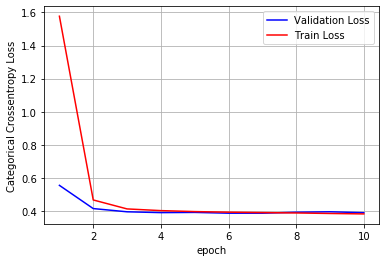

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = h2.history['val_loss']
ty = h2.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
result_1 = model_2.evaluate( test_2,
          y_test,batch_size=300)
result_2 = model_2.evaluate( train_2,
          y_train,batch_size=300)

87398/87398 [==============================] - 71s 817us/step


In [0]:
print(result_1)
print(result_2)

[0.38907690329191613, 0.7471514321091453]
[0.36438259380835275, 0.7953995821825852]


## **model_3**

#### text 

In [0]:
#https://subscription.packtpub.com/book/application_development/9781782167853/1/ch01lvl1sec10/tokenizing-sentences-into-words
t = Tokenizer()
t.fit_on_texts(x_train['essay'])
vocab_size = len(t.word_index) + 1
print('Total unique words in the x_train',vocab_size)
encoded_train = t.texts_to_sequences(x_train['essay'])
encoded_test = t.texts_to_sequences(x_test['essay'])

Total unique words in the x_train 51508


In [0]:
max_length = 300
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print("length of padded_train data",len(padded_train))
print("length of padded_test data",len(padded_test))

length of padded_train data 87398
length of padded_test data 21850


#### categorical data

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in x_train['clean_categories'].values:
    my_counter.update(word.split())


# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))  

# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['clean_categories'].values)
#print(vectorizer.get_feature_names())


categories_one_hot_train = vectorizer.transform(x_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(x_test['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

Shape of matrix after one hot encodig  (87398, 9)
Shape of matrix after one hot encodig  (21850, 9)


In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in x_train['clean_subcategories'].values:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))  

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['clean_categories'].values)
#print(vectorizer.get_feature_names())


categories_one_hot_train2 = vectorizer.transform(x_train['clean_subcategories'].values)
categories_one_hot_test2 = vectorizer.transform(x_test['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_train2.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_test2.shape)




Shape of matrix after one hot encodig  (87398, 30)
Shape of matrix after one hot encodig  (21850, 30)


In [0]:
'''encode categorical feature school_state'''


from collections import Counter
my_counter = Counter()
for word in x_train['school_state'].values:
    my_counter.update(word.split(" "))

state_dict = dict(my_counter)
state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))      
    
vectorizer = CountVectorizer(vocabulary=list(state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(x_train['school_state'].values)
#X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(x_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)

print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(87398, 51) (87398, 2)
(21850, 51) (21850, 2)
['vt', 'wy', 'nd', 'mt', 'ri', 'sd', 'ne', 'de', 'ak', 'nh', 'wv', 'me', 'hi', 'dc', 'nm', 'ks', 'ia', 'id', 'ar', 'co', 'mn', 'or', 'ms', 'ky', 'nv', 'md', 'ct', 'tn', 'al', 'ut', 'wi', 'va', 'az', 'nj', 'ok', 'wa', 'la', 'ma', 'oh', 'in', 'mo', 'pa', 'mi', 'sc', 'ga', 'il', 'nc', 'fl', 'ny', 'tx', 'ca']


In [0]:
'''encode categorical feature project_grade_category'''

from collections import Counter
my_counter = Counter()
for word in x_train['project_grade_category'].values:
    my_counter.update(word.split(","))
    
grade_dict = dict(my_counter)
grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))    
vectorizer = CountVectorizer(vocabulary=list(grade_dict.keys()), lowercase=False, binary=True)




vectorizer.fit(x_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(x_train['project_grade_category'].values)
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(x_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(87398, 4) (87398, 2)
(21850, 4) (21850, 2)
['grades_9_12', 'grades_6_8', 'grades_3_5', 'grades_prek_2']


In [0]:
from collections import Counter
my_counter = Counter()
for word in x_train['teacher_prefix'].values:
    my_counter.update(word.split())
    
prefix = dict(my_counter)
prefix = dict(sorted(prefix.items(), key=lambda kv: kv[1]))

# code is taken from this notebook

'''encode categorical feature teacher_prefix'''
vectorizer = CountVectorizer(vocabulary=list(prefix.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(x_train['teacher_prefix'].values.astype('U'))
#X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
X_test_teacher_ohe = vectorizer.transform(x_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)

print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(87398, 5) (87398, 2)
(21850, 5) (21850, 2)
['dr', 'teacher', 'mr', 'ms', 'mrs']


#### numerical

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

'''encode numerical feature price'''
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['price'].values.reshape(1,-1)) # use code from sample

X_train_price_norm = normalizer.transform(x_train['price'].values.reshape(-1,1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)

print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(87398, 1) (87398, 2)
(21850, 1) (21850, 2)


In [0]:
'''encode numerical feature teacher_number_of_previously_posted_projects'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
 
X_train_posted_norm= normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#X_cv_posted_norm= normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_posted_norm = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_posted_norm.shape, y_train.shape)

print(X_test_posted_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(87398, 1) (87398, 2)
(21850, 1) (21850, 2)


In [0]:
'''encode numerical feature teacher_number_of_previously_posted_projects'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['quantity'].values.reshape(1,-1))
 
X_train_quan_norm= normalizer.transform(x_train['quantity'].values.reshape(-1,1))
#X_cv_quan_norm= normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quan_norm = normalizer.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_posted_norm.shape, y_train.shape)

print(X_test_posted_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(87398, 1) (87398, 2)
(21850, 1) (21850, 2)


In [0]:
#merge all features
from scipy.sparse import hstack
X_tr = hstack(( X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,categories_one_hot_train,categories_one_hot_train2,X_train_posted_norm,X_train_quan_norm)).todense()
#X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_titles_bow,X_cv_subclean_cate_ohe,X_cv_clean_cate_ohe,X_cv_posted_norm)).tocsr()
X_te = hstack(( X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,categories_one_hot_test,categories_one_hot_test2,X_test_posted_norm,X_test_quan_norm)).todense()

print("Final Data matrix")
print("train matrix=>",X_tr.shape, y_train.shape)
#print("cv matrix=>",X_cr.shape, y_cv.shape)
print("test matrix=>",X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
train matrix=> (87398, 102) (87398, 2)
test matrix=> (21850, 102) (21850, 2)


In [0]:
rest_features_train = np.expand_dims(X_tr,2)
rest_features_test = np.expand_dims(X_te,2)

In [0]:
print(rest_features_test.shape)
print(rest_features_train.shape)

(21850, 102, 1)
(87398, 102, 1)


In [0]:
X_tr=rest_features_train
X_te=rest_features_test

In [0]:
from keras.layers import Conv1D, MaxPooling2D

In [0]:
essay_input = Input(shape=(300,), name='essay_input')

x = Embedding(vocab_size, 300, weights=[embedding_matrix_train], input_length=300,trainable=False)(essay_input)
lstm_out = LSTM(100,recurrent_dropout=0.5,return_sequences=True)(x)
flatten_1 = Flatten()(lstm_out)

#other=Input(shape=(102,1), name='other')

other = Input(shape=(X_tr.shape[1],1), name="other")
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Activation



# Block 1
con1 = Conv1D(64, kernel_size = 3, activation = 'relu', name = 'block_1')(other)

# Block 2
con2 = Conv1D(64, 3, activation='relu', padding = 'same', name = 'block_2')(con1)

# Block 3
con3 = Conv1D(32, 3, activation='softmax', padding = 'same',  name = 'block_3')(con2)

# Block 4
con4 = Conv1D(32, 3, activation='softmax', padding = 'same',  name = 'block_4')(con3)

# Flattening
flatten_2 = Flatten()(con4)
#flatten_2 = Flatten()(rem_conv2)


x = concatenate([flatten_1,flatten_2])





# Layer 1
m_3 = Dense(256, activation = 'relu', kernel_regularizer = l2(0.01))(x)
m_3 = Dropout(0.3)(m_3)

# Layer 2
m_3 = Dense(128, activation = 'relu', kernel_regularizer = l2(0.01))(m_3)
m_3 = Dropout(0.3)(m_3)

# Layer 3
m_3 = Dense(64, activation = 'relu', kernel_regularizer = l2(0.01))(m_3)
m_3 = Dropout(0.3)(m_3)

# Layer 4
m_3 = Dense(32, activation = 'relu', kernel_regularizer = l2(0.01))(m_3)
m_3 = Dropout(0.3)(m_3)

x = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(m_3)
final_output = Dense(2, activation='softmax',kernel_initializer="he_normal")(x)

model = Model(inputs=[essay_input,other], outputs=[final_output])
print(model.summary())





Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
other (InputLayer)              (None, 102, 1)       0                                            
__________________________________________________________________________________________________
block_1 (Conv1D)                (None, 100, 64)      256         other[0][0]                      
__________________________________________________________________________________________________
essay_input (InputLayer)        (None, 300)          0                                            
__________________________________________________________________________________________________
block_2 (Conv1D)                (None, 100, 64)      12352       block_1[0][0]                    
____________________________________________________________________________________________

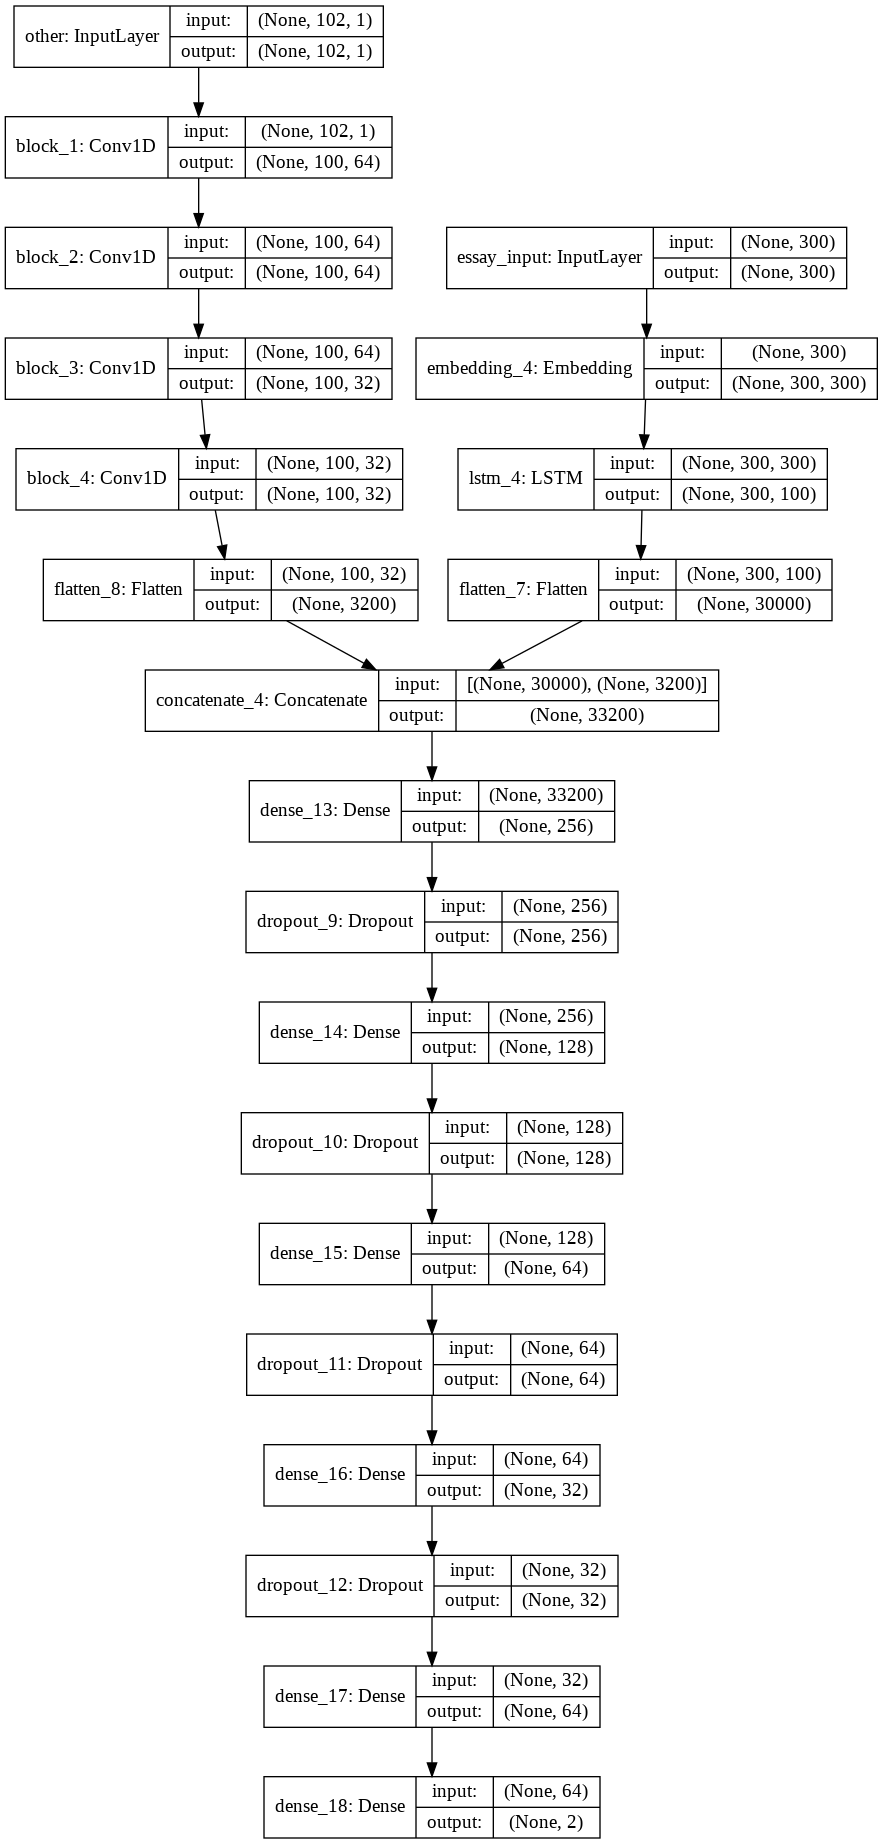

In [0]:
#https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/model3.png', show_shapes=True, show_layer_names=True)

In [0]:
from keras import backend as K
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
#https://stackoverflow.com/posts/51734992/revisions
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:
train_2 = [padded_train,X_tr]
test_2 = [padded_test,X_te]

In [0]:
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
from keras.callbacks import *
filepath="epochs:{epoch:03d}-val_acc:{val_auroc:.3f}.hdf5"
checkpoint_1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, mode='max')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
X_te.shape

(21850, 102)

In [0]:
X_trn = np.expand_dims(X_tr, 2)

In [0]:
X_tr.shape

(87398, 102, 1)

In [0]:
from numpy import zeros, newaxis
X_te=X_te.toarray()
X_te= X_te[:, :, newaxis]
#x_cv_rem_reshape = np.array(x_cv_rem).reshape(17480, 102,1)

In [0]:
X_te.shape

(21850, 102, 1)

In [0]:
X_tr.shape

(87398, 102, 1)

In [0]:
from tensorflow.keras.callbacks import TensorBoard

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
h2 = model.fit(train_2, y_train, batch_size=300,epochs=10, verbose=1, validation_data=(test_2, y_test))

Train on 87398 samples, validate on 21850 samples
Epoch 1/10
87398/87398 [==============================] - 207s 2ms/step - loss: 1.3950 - auroc: 0.6431 - val_loss: 0.5170 - val_auroc: 0.7216
Epoch 2/10
87398/87398 [==============================] - 204s 2ms/step - loss: 0.4670 - auroc: 0.7139 - val_loss: 0.4271 - val_auroc: 0.7401
Epoch 3/10
87398/87398 [==============================] - 204s 2ms/step - loss: 0.4235 - auroc: 0.7269 - val_loss: 0.4205 - val_auroc: 0.7442
Epoch 4/10
87398/87398 [==============================] - 204s 2ms/step - loss: 0.4081 - auroc: 0.7378 - val_loss: 0.3995 - val_auroc: 0.7455
Epoch 5/10
87398/87398 [==============================] - 202s 2ms/step - loss: 0.3996 - auroc: 0.7453 - val_loss: 0.3980 - val_auroc: 0.7525
Epoch 6/10
87398/87398 [==============================] - 202s 2ms/step - loss: 0.3953 - auroc: 0.7490 - val_loss: 0.4062 - val_auroc: 0.7540
Epoch 7/10
87398/87398 [==============================] - 203s 2ms/step - loss: 0.3909 - auroc: 0.

In [0]:
epochs=10

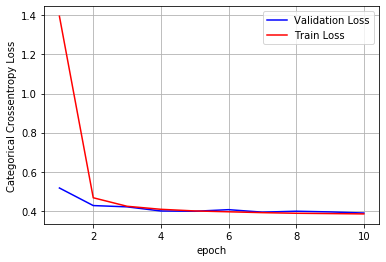

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = h2.history['val_loss']
ty = h2.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
result_1 = model.evaluate( test_2,
          y_test,batch_size=300)
result_2 = model.evaluate( train_2,
          y_train,batch_size=300)

87398/87398 [==============================] - 78s 889us/step


In [0]:
print(result_1)
print(result_2)

[0.38902702382009147, 0.7557097569848487]
[0.37026190312547774, 0.7861486324860277]


In [0]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["model", "train_auc","test_auc"]

In [0]:
x.add_row(['model_1',0.787,0.757])
x.add_row(['model_2',0.795,0.747])
x.add_row(['model_3',0.786,0.755])



In [3]:
print(x)

+---------+-----------+----------+
|  model  | train_auc | test_auc |
+---------+-----------+----------+
| model_1 |   0.787   |  0.757   |
| model_2 |   0.795   |  0.747   |
| model_3 |   0.786   |  0.755   |
+---------+-----------+----------+


**note**
- refercence used 
- https://github.com/ravi-1654003/LSTM-DonorsChoose/blob/master/LSTM_DonorsChoose.ipynb  
- https://github.com/sandeepburra/LSTM-Donors-Choose/blob/master/LSTM.ipynb
- https://github.com/mrunal46/Donors-Choose-using-LSTM/blob/masterLSTM%20on%20Donor's%20Choose%20-%20Model%201-Copy1.ipynb
- https://github.com/richardxing/DonorsChoose/blob/master/DonorsChoose-RNN.ipynb
- https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526
-https://medium.com/@satnalikamayank12/on-learning-embeddings-for-categorical-data-using-keras-165ff2773fc9
- https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/